# Rainfall prediction in Austrlia

## Importing Data & Required libraries

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import plotly as py
import sklearn as sk
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv ('weatherAUS1.csv')

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df.shape


(145460, 23)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Seggregating the data into categorical and numerical

In [9]:
categorical_data = [col for col in df.columns if df[col].dtype == 'O']
print("Number of Categorical features in data : {}".format(len(categorical_data)))
print("The Categorical Features are: ",categorical_data)

Number of Categorical features in data : 7
The Categorical Features are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
numerical_data = [col for col in df.columns if df[col].dtype != 'O']
print("Number of Numerical features in data: {}".format(len(numerical_data)))
print("The Numerical Features are: ",numerical_data)

Number of Numerical features in data: 16
The Numerical Features are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


#### Type conversion

In [11]:
#Converting Date column to datetime type

df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [13]:
df.drop('Date', axis = 1, inplace = True)

In [14]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [15]:
Null_Col= df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
Null_Col

Location           0.0 %
year               0.0 %
month              0.0 %
day                0.0 %
MaxTemp           0.87 %
MinTemp           1.02 %
Temp9am           1.21 %
WindSpeed9am      1.21 %
Humidity9am       1.82 %
Pressure3pm      10.33 %
Pressure9am      10.36 %
WindSpeed3pm      2.11 %
Rainfall          2.24 %
RainToday         2.24 %
RainTomorrow      2.25 %
Temp3pm           2.48 %
WindDir3pm        2.91 %
Humidity3pm        3.1 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustSpeed     7.06 %
WindGustDir        7.1 %
WindDir9am        7.26 %
dtype: object

In [16]:
num_of_nulls = df.isna().sum()
num_of_nulls

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

<Axes: >

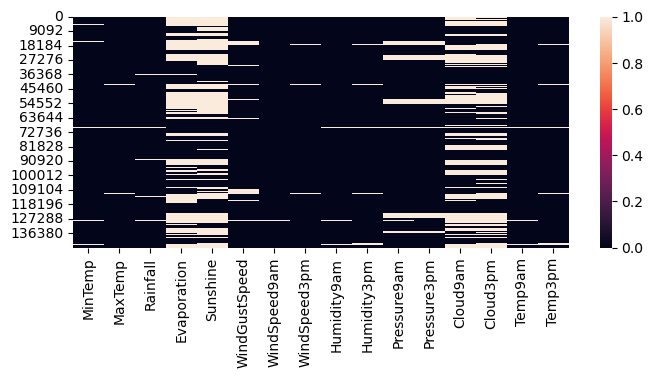

In [17]:
plt.figure(figsize=(8,3))
sns.heatmap(df[numerical_data].isnull(),linecolor='white')

<Axes: >

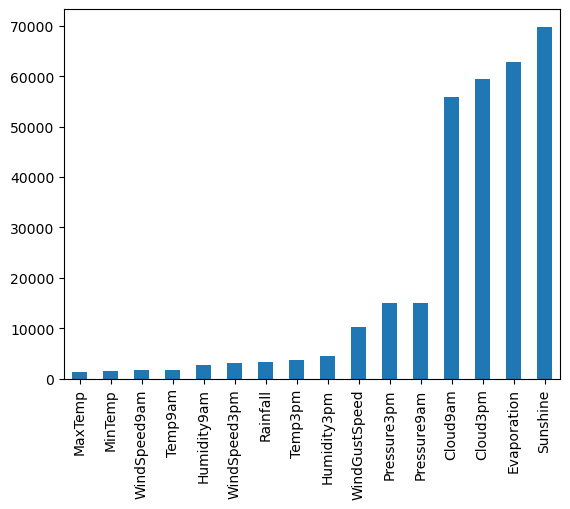

In [18]:
df[numerical_data].isnull().sum().sort_values(ascending = True).plot(kind = 'bar')

# checking Outliers

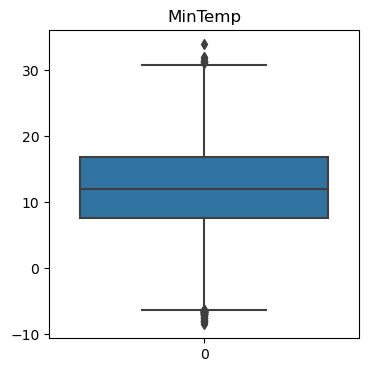

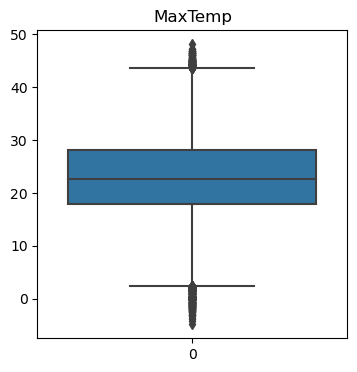

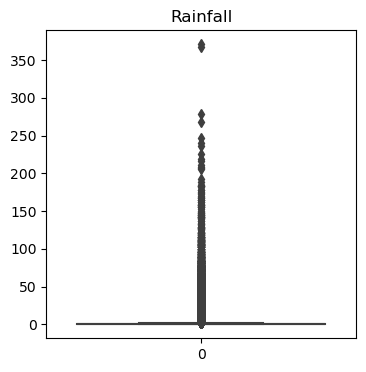

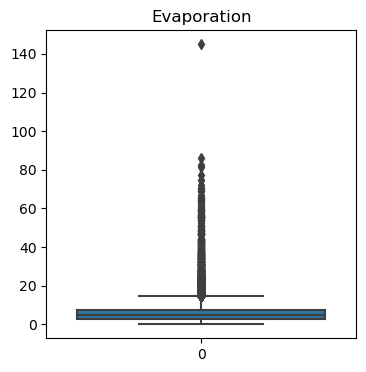

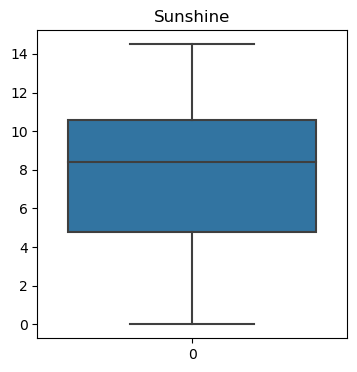

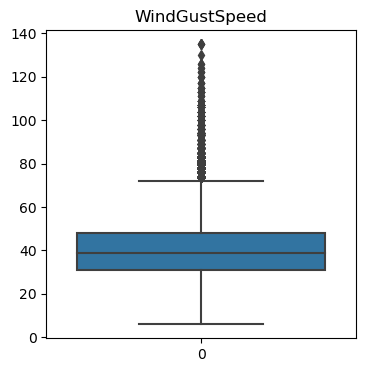

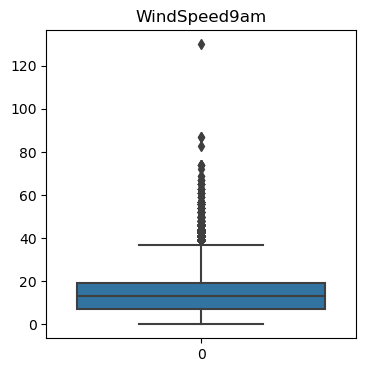

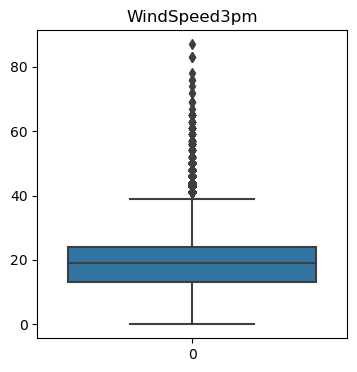

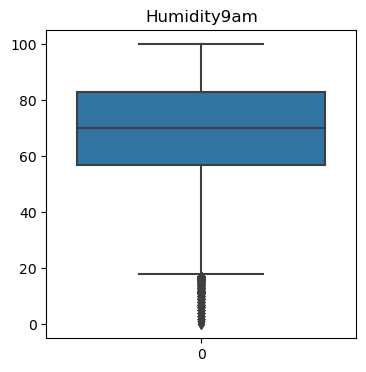

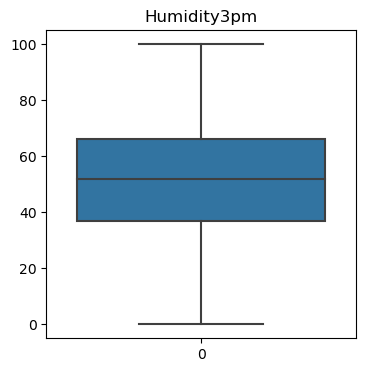

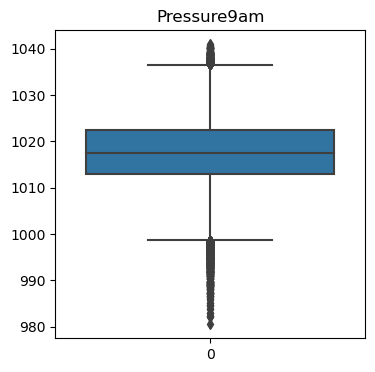

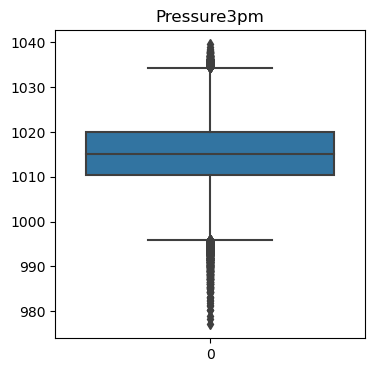

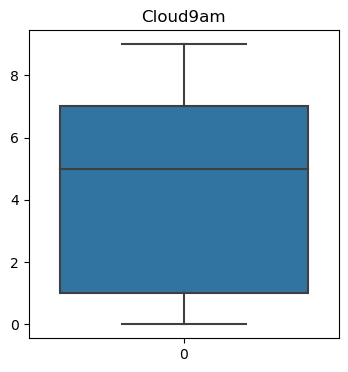

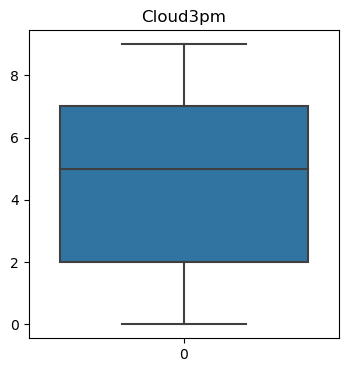

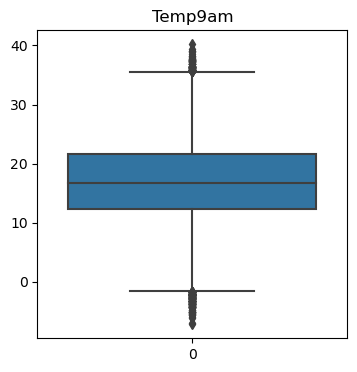

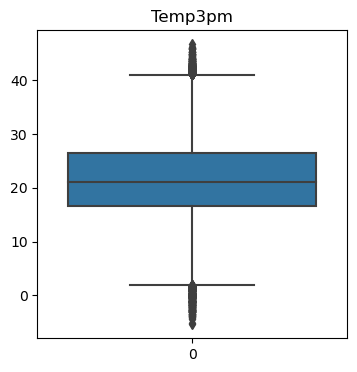

In [19]:
#lets check for outliers in the numerical data
for i in numerical_data:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])
    plt.title(i)

## Outliers treatment

In [20]:
outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[i]<lower_limit,i] = lower_limit
    df.loc[df[i]>upper_limit,i] = upper_limit

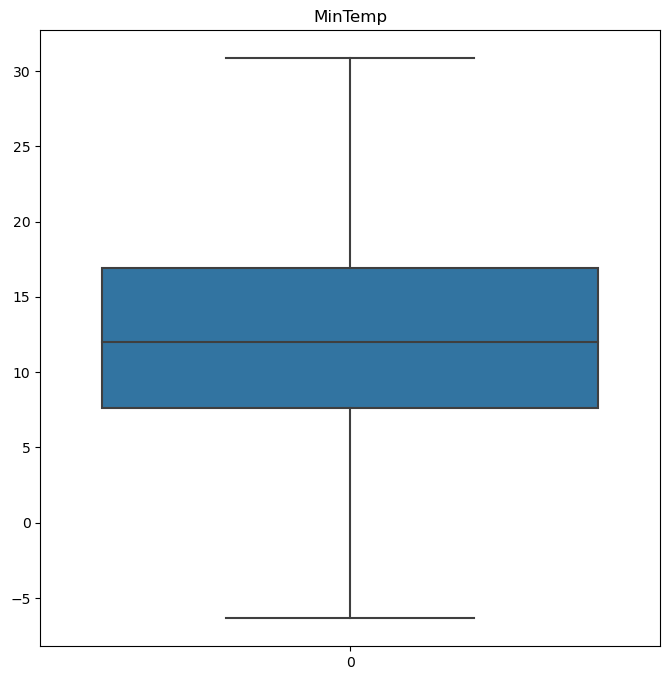

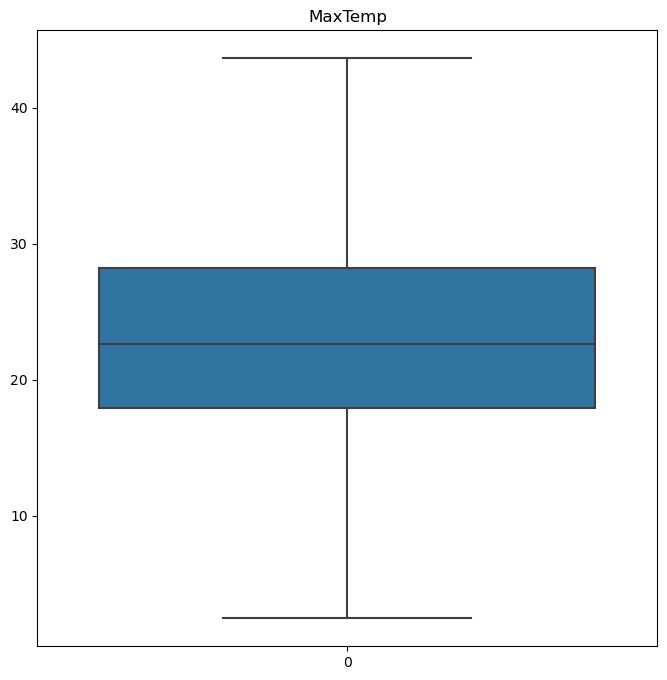

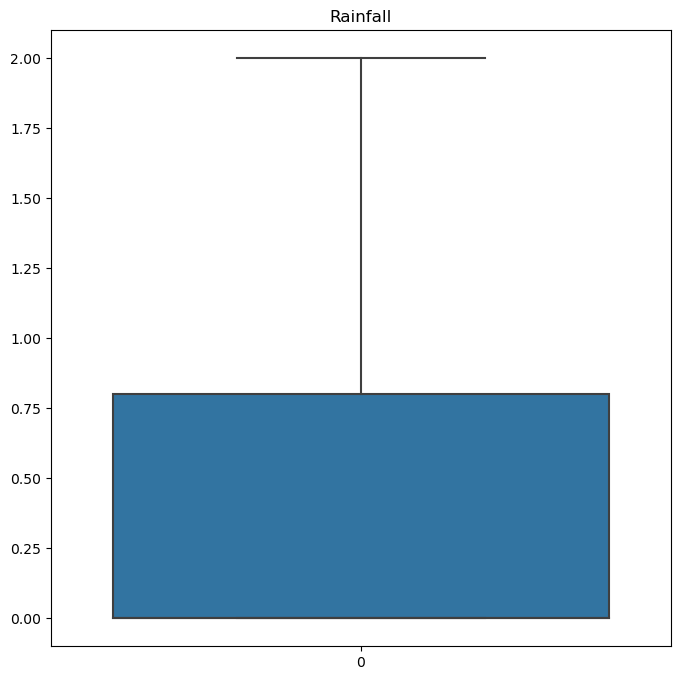

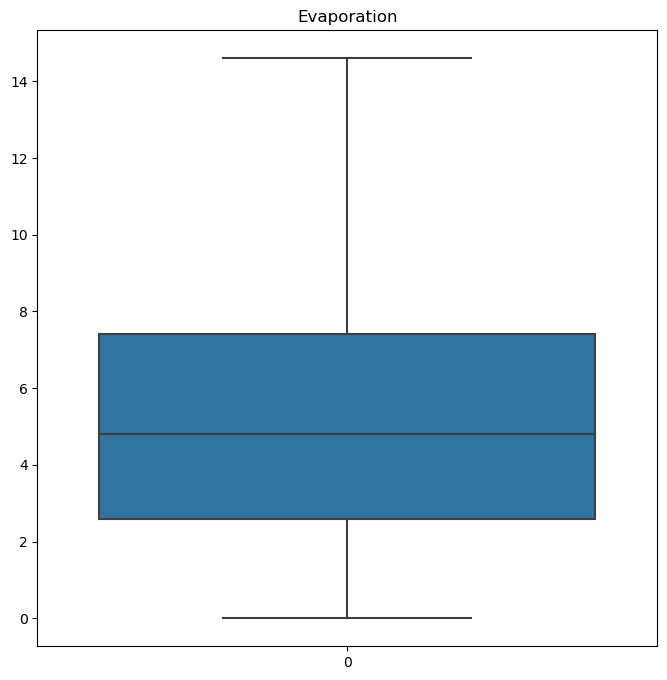

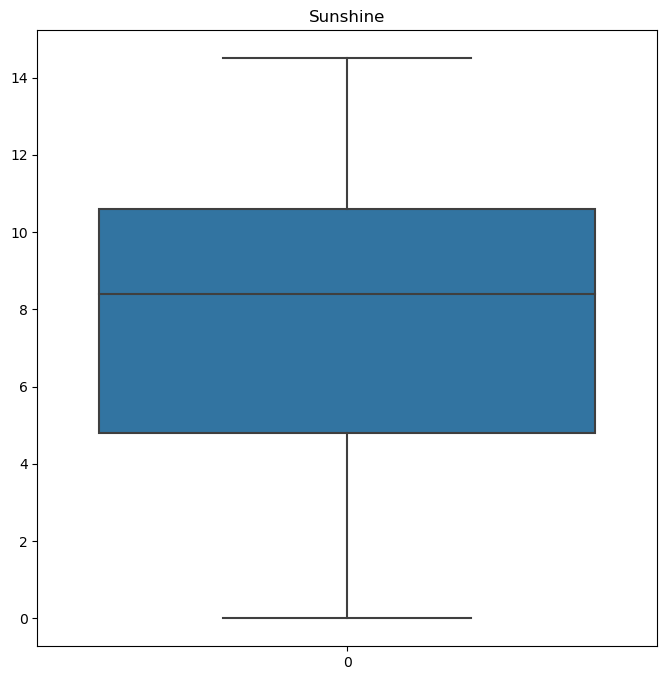

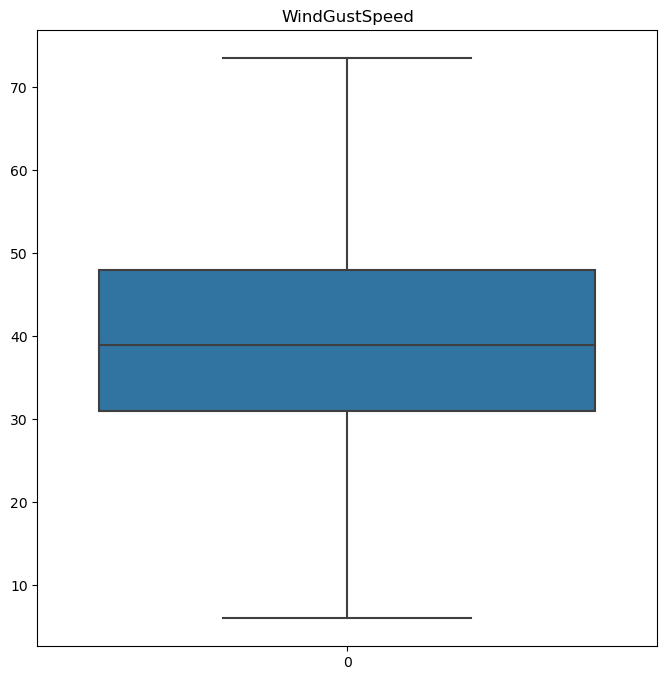

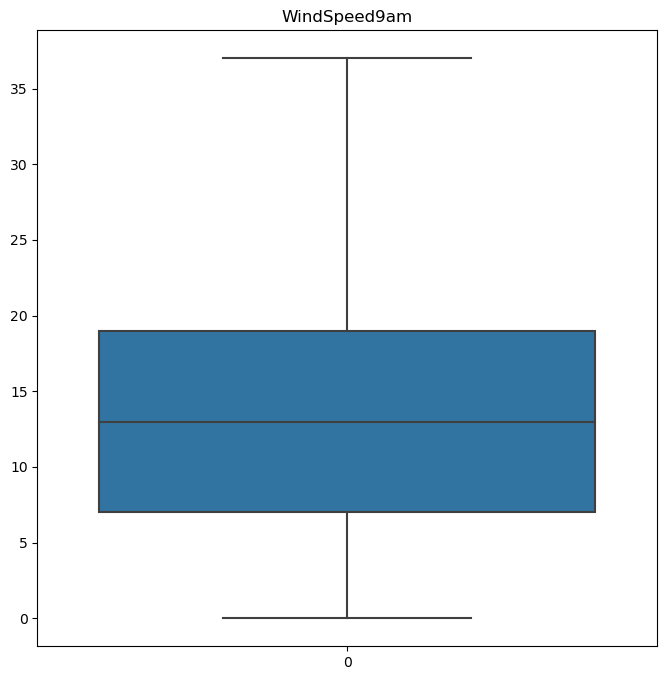

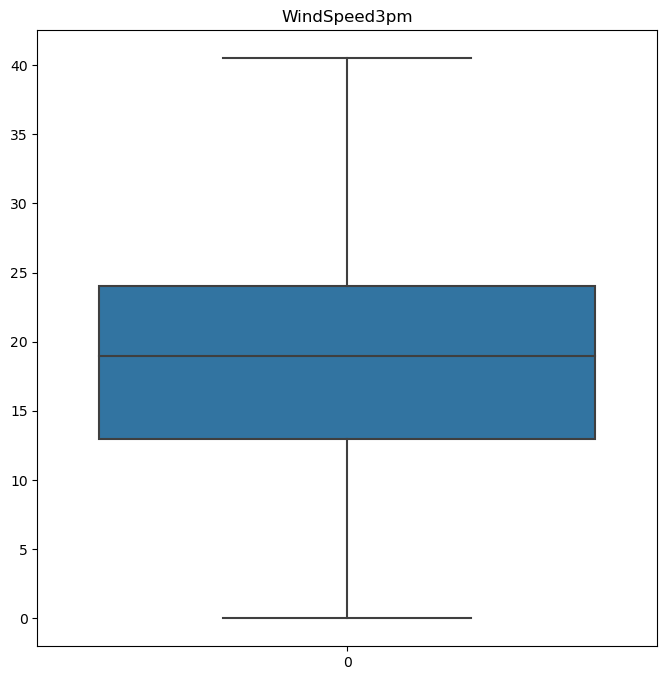

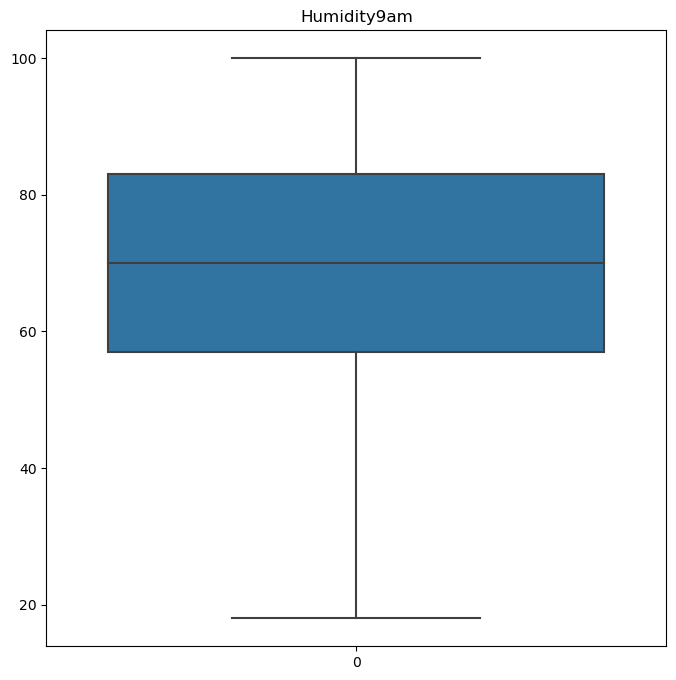

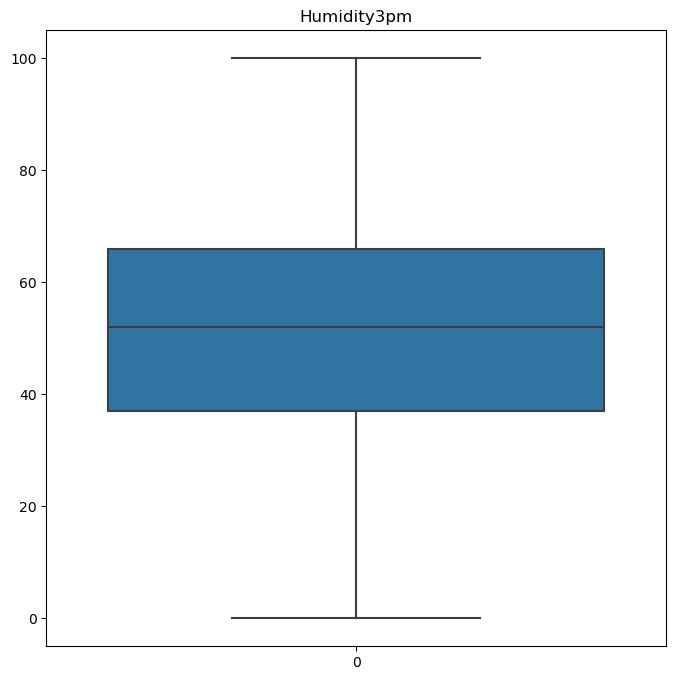

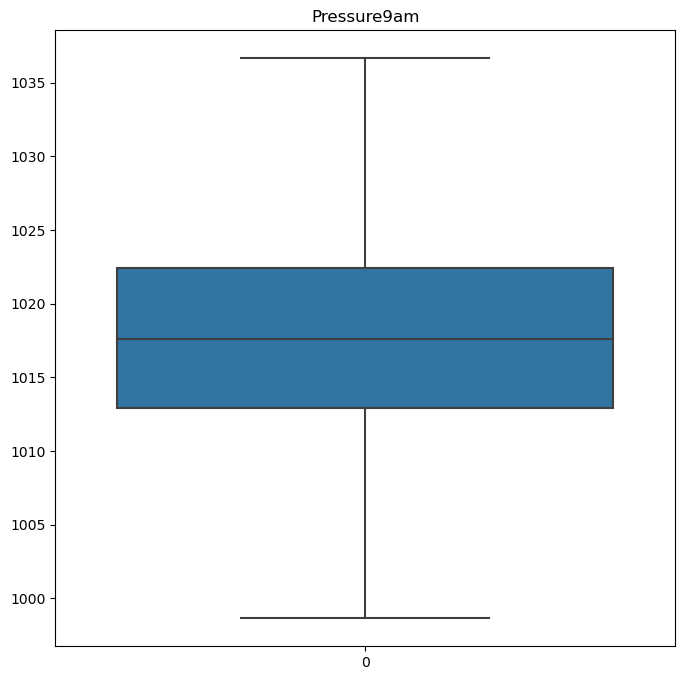

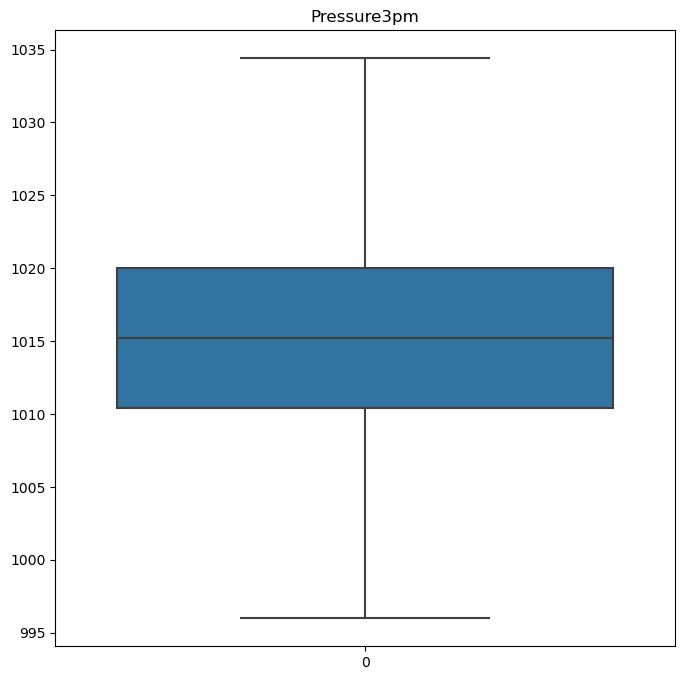

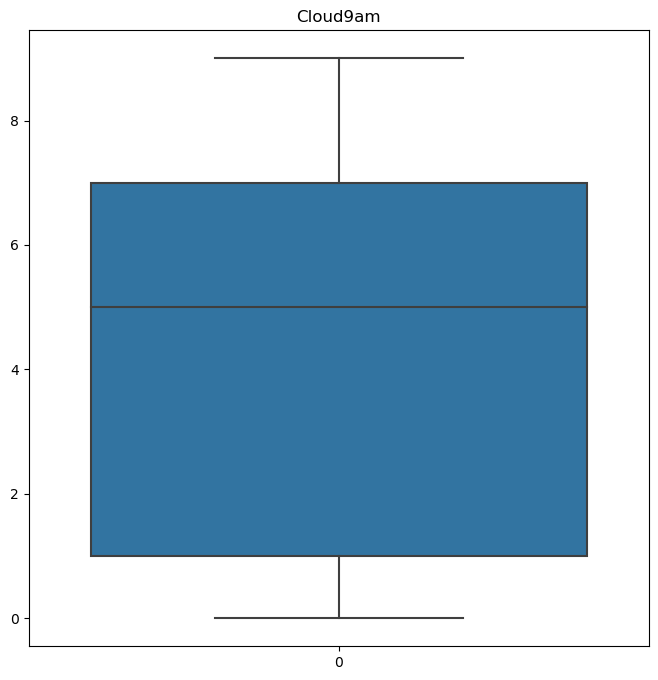

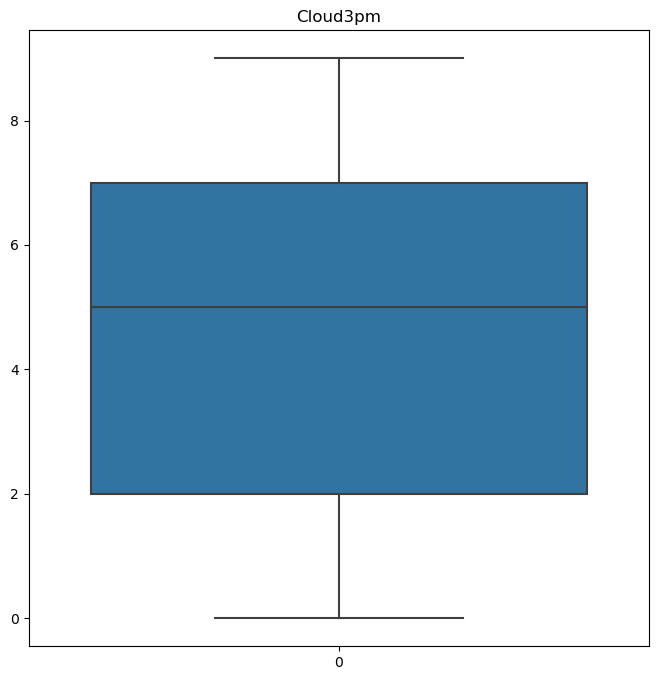

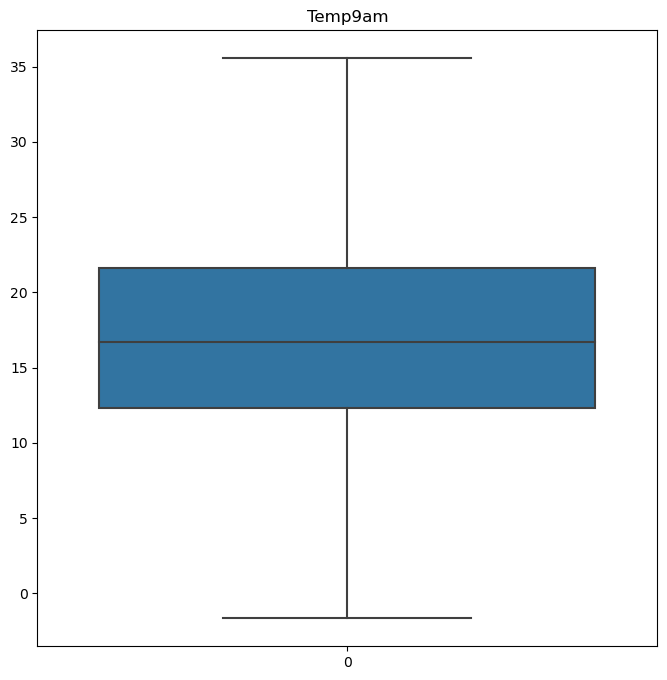

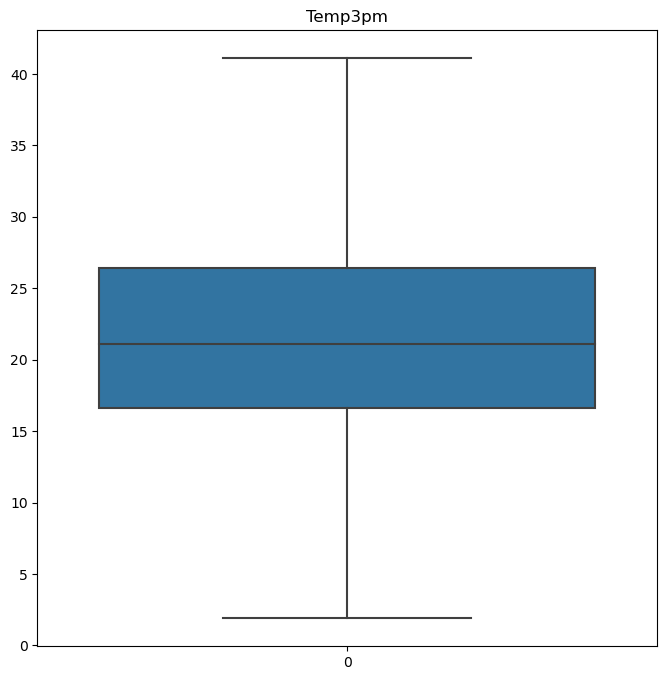

In [21]:
for i in numerical_data:
    plt.figure(figsize=(8,8))
    sns.boxplot(df[i])
    plt.title(i)

In [22]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<Axes: >

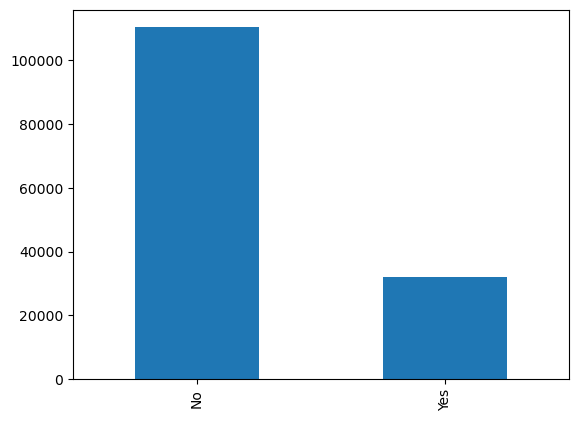

In [23]:
df['RainTomorrow'].value_counts().plot(kind = 'bar')

In [24]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

<Axes: >

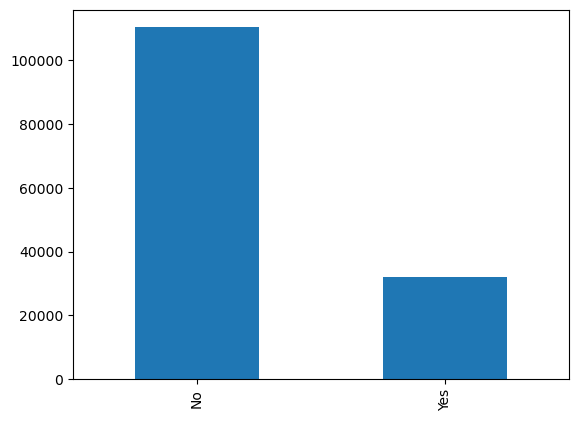

In [25]:
df['RainToday'].value_counts().plot(kind = 'bar')

# Bivariate Analysis of Rainfall data

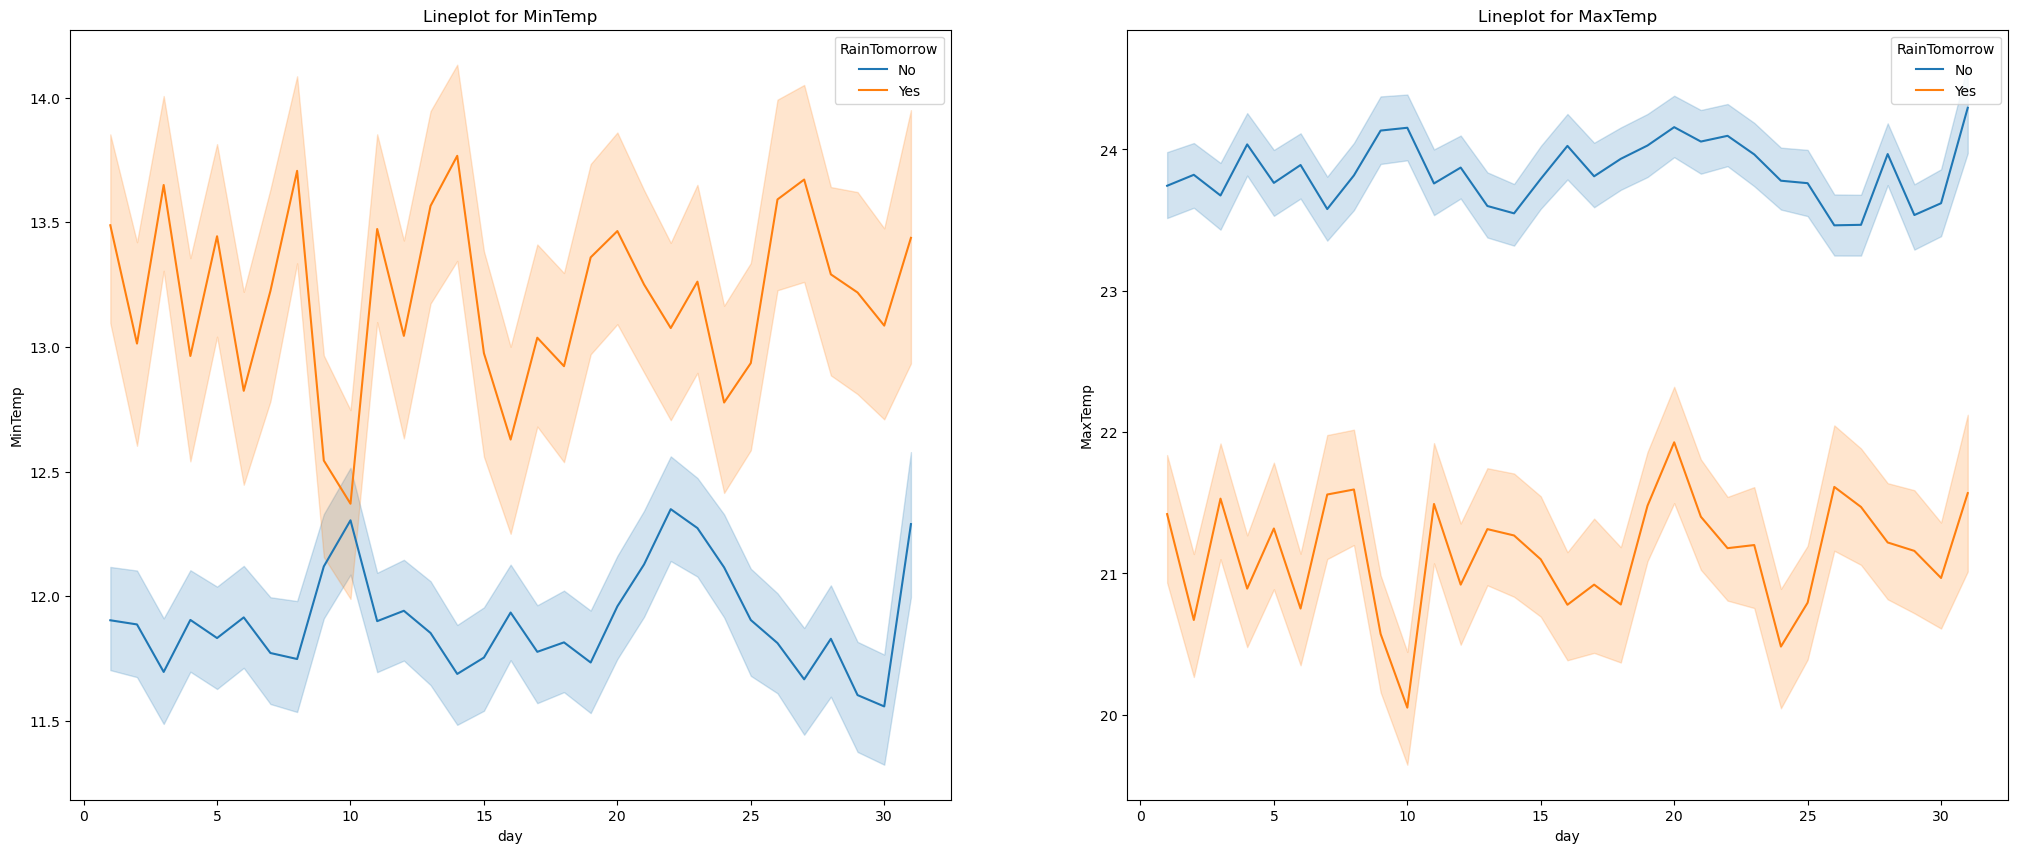

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Mintemp
sns.lineplot(ax=axes[0],x="day",y="MinTemp",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for MinTemp')
# Maxtemp
sns.lineplot(ax=axes[1],x="day",y="MaxTemp",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for MaxTemp')
plt.show()

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

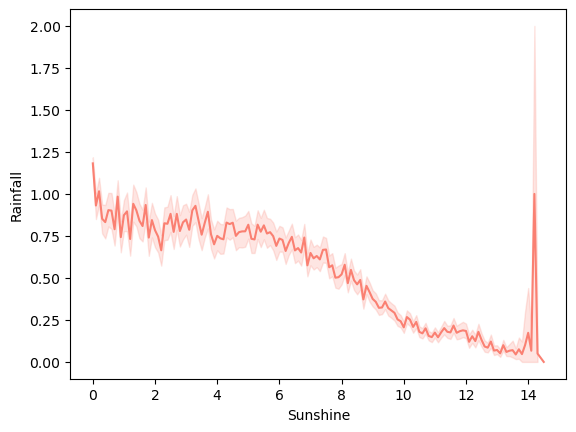

In [27]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='salmon')

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

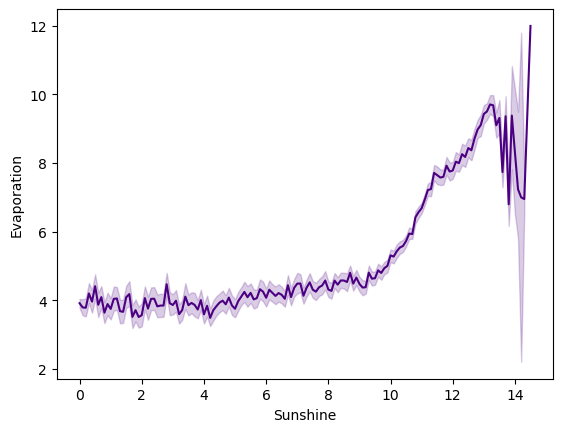

In [28]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='indigo')

In [29]:
df.corr()

C:\Users\shiva\AppData\Local\Temp\ipykernel_5896\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.736492,0.051653,0.538341,0.072579,0.185379,0.179168,0.179335,-0.232643,0.006127,-0.456704,-0.465552,0.078751,0.021605,0.901879,0.708804,0.043273,-0.203847,0.002354
MaxTemp,0.736492,1.000000,-0.258675,0.671409,0.470240,0.075120,0.017316,0.053728,-0.503117,-0.508533,-0.338467,-0.432250,-0.289365,-0.277928,0.887079,0.984454,0.062058,-0.163974,0.000657
Rainfall,0.051653,-0.258675,1.000000,-0.252310,-0.364579,0.159075,0.103992,0.081772,0.392601,0.415487,-0.190890,-0.101108,0.337648,0.297941,-0.115102,-0.265335,-0.014624,0.012104,0.003326
Evaporation,0.538341,0.671409,-0.252310,1.000000,0.387905,0.235897,0.216062,0.154941,-0.567302,-0.433228,-0.318565,-0.344400,-0.203875,-0.207593,0.628551,0.653088,0.081879,-0.032150,-0.007203
Sunshine,0.072579,0.470240,-0.364579,0.387905,1.000000,-0.028835,0.009726,0.058734,-0.492558,-0.629130,0.039898,-0.022177,-0.675323,-0.703930,0.291171,0.490711,0.008788,0.024327,-0.000397
WindGustSpeed,0.185379,0.075120,0.159075,0.235897,-0.028835,1.000000,0.605074,0.687616,-0.221686,-0.029955,-0.457019,-0.411257,0.069928,0.107319,0.158483,0.040459,-0.030311,0.060510,-0.009991
WindSpeed9am,0.179168,0.017316,0.103992,0.216062,0.009726,0.605074,1.000000,0.514215,-0.275990,-0.033758,-0.227867,-0.175352,0.023213,0.052198,0.132673,0.007332,-0.017985,0.051835,-0.008933
WindSpeed3pm,0.179335,0.053728,0.081772,0.154941,0.058734,0.687616,0.514215,1.000000,-0.148749,0.015285,-0.295254,-0.253645,0.052697,0.023317,0.167882,0.031510,-0.030104,0.059588,-0.010439
Humidity9am,-0.232643,-0.503117,0.392601,-0.567302,-0.492558,-0.221686,-0.275990,-0.148749,1.000000,0.666743,0.141287,0.188334,0.453617,0.358456,-0.470254,-0.497224,0.009833,-0.089841,0.015259
Humidity3pm,0.006127,-0.508533,0.415487,-0.433228,-0.629130,-0.029955,-0.033758,0.015285,0.666743,1.000000,-0.025936,0.053827,0.517120,0.523120,-0.220622,-0.557459,-0.009662,-0.018858,0.013013


<Axes: >

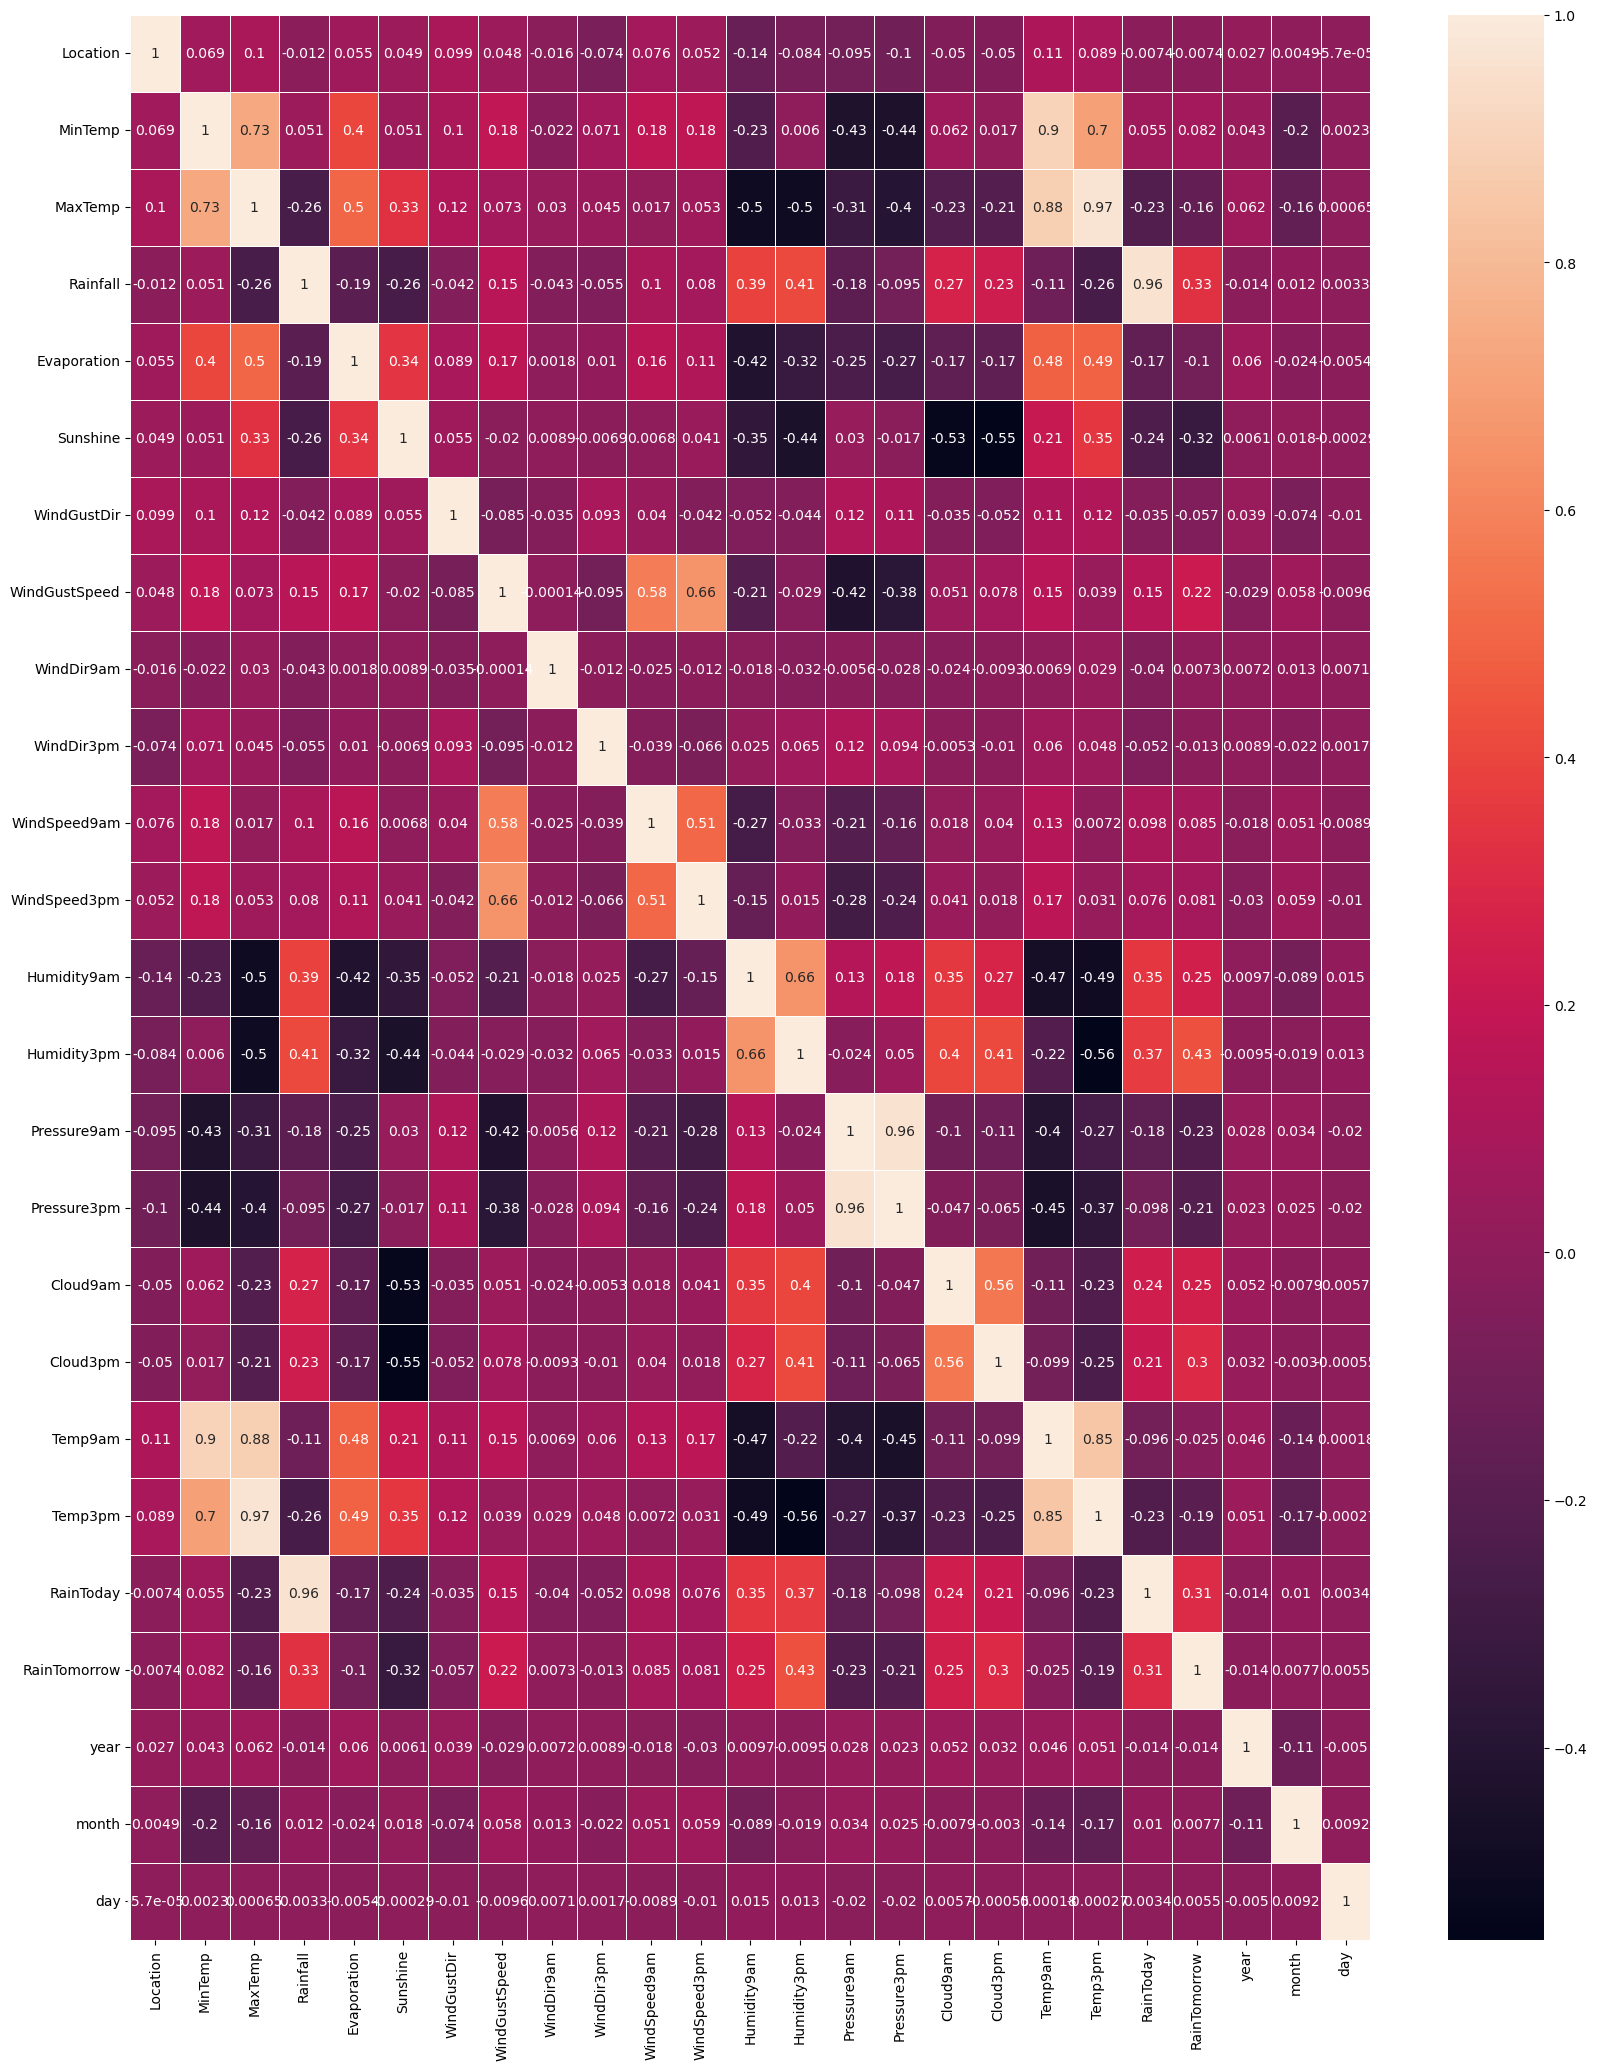

In [96]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

In [31]:
#Preparing the Data

In [32]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [33]:
categorical_data1 = [col for col in df.columns if df[col].dtype == 'O']
print("The Categorical Features are: ",categorical_data1)

The Categorical Features are:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [34]:
categorical_nulls = [i for i in categorical_data1 if df[i].isnull().sum()]
for k in categorical_nulls:
    mode = df[k].mode()[0]
    df[k].fillna(mode,inplace=True)

In [35]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [36]:
for i in numerical_data:
    mean = df[i].mean()
    df[i].fillna(mean, inplace = True)

In [37]:
def encoding(feature):
    f = {}
    unq_values = list(df[feature].unique())
    for i in range(len(unq_values)):
        f[unq_values[i]] = i
    print(f)
    return f

In [38]:
df['Location'].replace(encoding('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [39]:
df['WindGustDir'].replace(encoding('WindGustDir'), inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [40]:
df['WindDir9am'].replace(encoding('WindDir9am'), inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [41]:
df['WindDir3pm'].replace(encoding('WindDir3pm'), inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [42]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.900000,0.6,5.318667,7.611178,0,44.000000,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.100000,0.0,5.318667,7.611178,1,44.000000,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.700000,0.0,5.318667,7.611178,2,46.000000,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.000000,0.0,5.318667,7.611178,3,24.000000,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.300000,1.0,5.318667,7.611178,0,41.000000,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,48,2.8,23.400000,0.0,5.318667,7.611178,14,31.000000,2,7,...,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6,21
145456,48,3.6,25.300000,0.0,5.318667,7.611178,4,22.000000,2,12,...,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6,22
145457,48,5.4,26.900000,0.0,5.318667,7.611178,5,37.000000,2,0,...,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6,23
145458,48,7.8,27.000000,0.0,5.318667,7.611178,12,28.000000,5,12,...,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6,24


### Feature engineering

In [43]:
X= df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
import xgboost
import matplotlib.pyplot as plt


model = xgboost.XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
print(model.feature_importances_) 

[0.03299867 0.02101152 0.02252853 0.08100245 0.01535447 0.06302367
 0.01999611 0.07437669 0.01748706 0.02509777 0.01563192 0.01943126
 0.02107717 0.34123042 0.01899696 0.05535996 0.01405161 0.05494891
 0.01753709 0.02176187 0.         0.01399165 0.02071564 0.01238864]


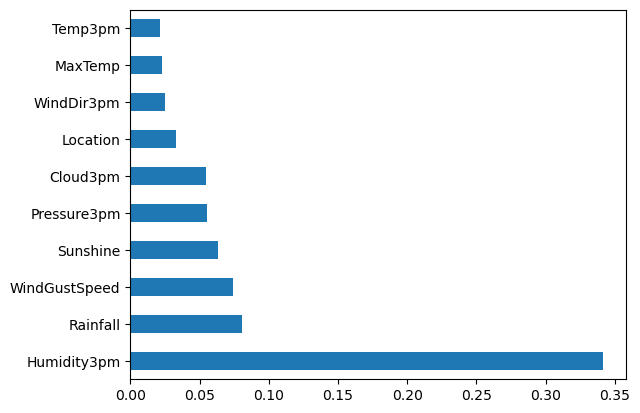

<Figure size 800x600 with 0 Axes>

In [47]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()


# Model Implementation :

### Logistic Regression

In [48]:
from sklearn.model_selection import train_test_split
  
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
  
model_lg = LogisticRegression(random_state = 0)
model_lg.fit(Xtrain, ytrain)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [50]:
y_pred = model_lg.predict(Xtest)

In [51]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[32363  1735]
 [ 5168  4372]]


In [52]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8418121820431734


In [53]:
from sklearn.metrics import classification_report

pred=model_lg.predict(Xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34098
           1       0.72      0.46      0.56      9540

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638



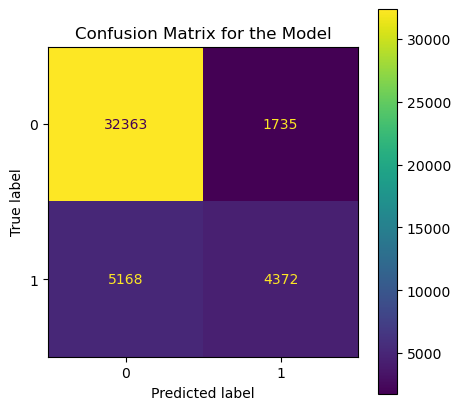

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

In [55]:
###################################################


## Random Forest

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.30, random_state=42)

In [59]:
model_rf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = model_rf.predict(X_test)

In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8570511939135615


In [62]:
from sklearn.metrics import classification_report

pred=model_rf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34075
           1       0.77      0.50      0.61      9563

    accuracy                           0.86     43638
   macro avg       0.82      0.73      0.76     43638
weighted avg       0.85      0.86      0.85     43638



In [63]:
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[29216  4882]
 [ 8181  1359]]


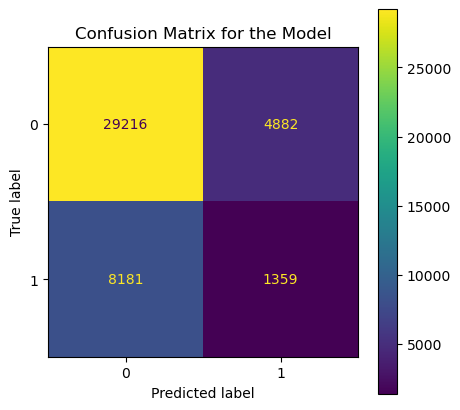

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.30, random_state=42)

In [67]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt = model_dt.fit(X_train,y_train)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
import sklearn.metrics as metrics

In [70]:
y_pred = model_dt.predict(X_test)#Accuracy
metrics.accuracy_score(y_test,y_pred)

0.7836060314404877

In [71]:
from sklearn.metrics import classification_report

pred=model_dt.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     34075
           1       0.51      0.54      0.52      9563

    accuracy                           0.78     43638
   macro avg       0.69      0.70      0.69     43638
weighted avg       0.79      0.78      0.79     43638



In [72]:
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[26186  7912]
 [ 7294  2246]]


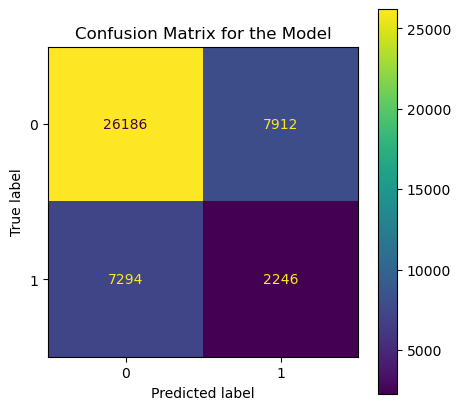

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

## XGB Classifier

In [74]:
import xgboost as xgb

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [76]:
xgb_classifier = xgb.XGBClassifier()

In [77]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
predictions = xgb_classifier.predict(X_test)

In [80]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [81]:
print("Accuracy of XGB:",accuracy_score(y_test,predictions))

Accuracy of XGB: 0.8591136165727119


In [82]:
from sklearn.metrics import classification_report

pred=xgb_classifier.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     34098
           1       0.74      0.55      0.63      9540

    accuracy                           0.86     43638
   macro avg       0.81      0.75      0.77     43638
weighted avg       0.85      0.86      0.85     43638



In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm = confusion_matrix(y_test,predictions)
cm

array([[32247,  1851],
       [ 4297,  5243]], dtype=int64)

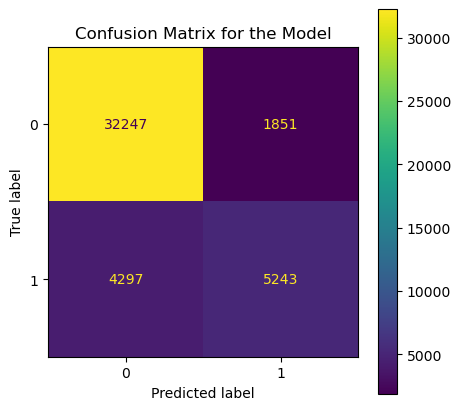

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

## GB Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [88]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

In [89]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [90]:
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[32428  1670]
 [ 4742  4798]]


In [91]:
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, gbc.predict(X_test)))

GBC accuracy is 0.85


In [92]:
from sklearn.metrics import classification_report

pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34098
           1       0.74      0.50      0.60      9540

    accuracy                           0.85     43638
   macro avg       0.81      0.73      0.75     43638
weighted avg       0.84      0.85      0.84     43638



In [93]:
cm_gbc = confusion_matrix(y_test,pred)
cm_gbc

array([[32428,  1670],
       [ 4742,  4798]], dtype=int64)

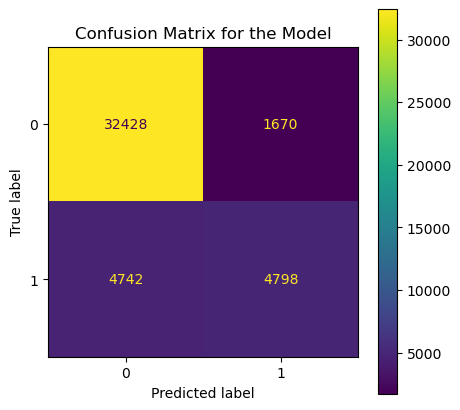

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm_gbc, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);